# MgCl2 Titrationen mit 116 mM Na(I) background

In [1]:
import b_lab_functions as blab
import main as main
import pandas as pd
#from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import seaborn as sns
from scipy import optimize
import matplotlib.gridspec as gridspec
import os

In [2]:
def rgb_to_hex(rgb):# hier kann ich direkt die Farben aus Inkscape eintragen und bekommen ienen colorcode mit #123456 raus
    """
    Convert an RGB color value to a hex color code.

    :param rgb: A tuple of red, green, and blue (each in the range 0-255)
    :return: A string representing the hex color code
    """
    r, g, b = rgb
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

In [3]:
# farbskala definieren fuer 3D Plots
my_gradient_blue = LinearSegmentedColormap.from_list('my_gradient_blue', (
    # Edit this gradient at https://eltos.github.io/gradient/#2B2D6F-1D3E6A-376993-4480A1-5C94AC
    (0.000, (0.169, 0.176, 0.435)),
    (0.250, (0.329, 0.443, 0.596)),
    (0.500, (0.510, 0.616, 0.706)),
    (0.750, (0.635, 0.780, 0.859)),
    (1.000, (0.800, 0.894, 0.937))))

In [4]:
data = pd.read_csv("2024-05-23_RNA_melting_MgCl2_Na.csv")

In [5]:
#DAS HIER IST DIE LSG
data['c (mM)'] = data['Name'].str.split(' ').str[0]

data['c (mM)'] = data['c (mM)'].astype(float)
data

,Temperature (C),Abs,Measurement,Name,norm_Abs,dabs_dt,c (mM)
0,90.000000,0.328287,1,10 mM MgCl2_260.00nm_90.0-21.0C,0.965340,-0.026642,10.0
1,89.000000,0.329694,1,10 mM MgCl2_260.00nm_90.0-21.0C,0.991983,-0.017330,10.0
2,88.000000,0.330117,1,10 mM MgCl2_260.00nm_90.0-21.0C,1.000000,-0.003025,10.0
3,87.000000,0.330013,1,10 mM MgCl2_260.00nm_90.0-21.0C,0.998033,0.008844,10.0
4,86.000000,0.329183,1,10 mM MgCl2_260.00nm_90.0-21.0C,0.982312,0.011655,10.0
...,...,...,...,...,...,...,...
2235,86.000000,0.111830,16,100 mM MgCl2_260.00nm_21.0-90.0C_R1,0.203702,-0.005147,100.0
2236,87.000000,0.086985,16,100 mM MgCl2_260.00nm_21.0-90.0C_R1,0.120555,-0.002212,100.0
2237,88.000000,0.110508,16,100 mM MgCl2_260.00nm_21.0-90.0C_R1,0.199277,0.167620,100.0
2238,89.000000,0.187159,16,100 mM MgCl2_260.00nm_21.0-90.0C_R1,0.455795,0.114803,100.0


In [6]:
result = data.loc[data['c (mM)'] == 0.1]

print(result)

      Temperature (C)       Abs  Measurement  \
840         90.000000  0.367799           13   
841         89.000000  0.368467           13   
842         88.000000  0.369133           13   
843         87.000000  0.369850           13   
844         86.000000  0.370041           13   
...               ...       ...          ...   
1115        86.000000  0.392226           16   
1116        87.000000  0.393037           16   
1117        88.000000  0.393910           16   
1118        89.000000  0.395015           16   
1119        89.699997  0.395799           16   

                                     Name  norm_Abs   dabs_dt  c (mM)  
840      0.1 mM MgCl2_260.00nm_90.0-21.0C  0.952462 -0.010820     0.1  
841      0.1 mM MgCl2_260.00nm_90.0-21.0C  0.963282 -0.010794     0.1  
842      0.1 mM MgCl2_260.00nm_90.0-21.0C  0.974050 -0.011177     0.1  
843      0.1 mM MgCl2_260.00nm_90.0-21.0C  0.985636 -0.007342     0.1  
844      0.1 mM MgCl2_260.00nm_90.0-21.0C  0.988734 -0.003695  

In [7]:
data['log_conc'] = np.log10(data['c (mM)'])
data = data[data['c (mM)'] != 0]

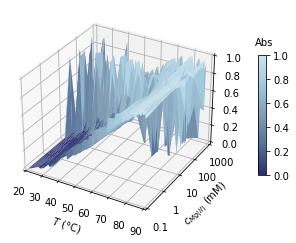

In [8]:
fig = plt.figure()
#ax = fig.gca(projection='3d') # funktioniert nicht mit neuester matplotlib-version
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(data['Temperature (C)'], data['log_conc'], data['norm_Abs'], cmap=my_gradient_blue, linewidth=0.1)
plt.colorbar(surf, shrink=0.55, aspect=15,pad = 0.1, location='right').set_label(label='Abs',size=10, labelpad=-25, y=1.15, rotation=0)
surf.set_clim(vmin=0, vmax=1)
yticks = [-1,0, 1, 2, 3]
ylabel = ['0.1','1', '10', '100', '1000']
ax.set_yticks(yticks, labels = ylabel)
ax.set_ylim([-1,3])
ax.set_xlim([20,90])
ax.set_zlim([0,1])
plt.xlabel('$T$ (°C)')
plt.ylabel('$c_{Mg(II)}$ (mM)')
#plt.savefig(".png", dpi=600, bbox_inches="tight")
plt.show()

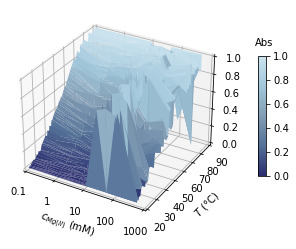

In [9]:
fig = plt.figure()
#ax = fig.gca(projection='3d') # funktioniert nicht mit neuester matplotlib-version
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(data['log_conc'], data['Temperature (C)'], data['norm_Abs'], cmap=my_gradient_blue, linewidth=0.1)
plt.colorbar(surf, shrink=0.55, aspect=15,pad = 0.1, location='right').set_label(label='Abs',size=10, labelpad=-25, y=1.15, rotation=0)
surf.set_clim(vmin=0.0, vmax=1.0)
xticks = [-1, 0, 1, 2, 3]
xlabel = ['0.1', '1', '10', '100', '1000']
ax.set_xticks(xticks, labels = xlabel)
ax.set_xlim([-1,3])
ax.set_ylim([20,90])
ax.set_zlim([0.0,1.0])
plt.ylabel('$T$ (°C)')
plt.xlabel('$c_{Mg(II)}$ (mM)')
plt.show()

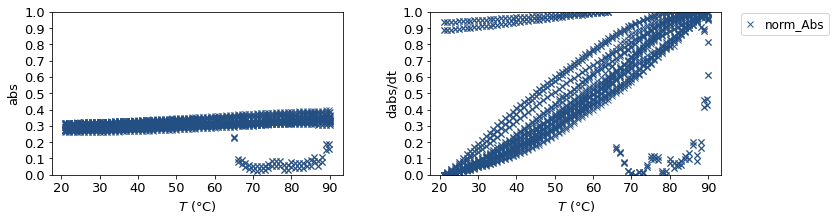

In [10]:
#f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), sharex=False, sharey=False, squeeze=False)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3), sharex=False, sharey=False, squeeze=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
temps = 8
palette = plt.get_cmap('Accent',temps)
# draw plot for the two plots
ax[0,0].scatter(data["Temperature (C)"], data["Abs"], marker='x', color=rgb_to_hex((36, 79, 130)), linewidth=1, alpha=0.9, label='abs')

ax[0,1].scatter(data["Temperature (C)"], data["norm_Abs"], marker='x', color=rgb_to_hex((36, 79, 130)), linewidth=1, alpha=0.9, label='norm_Abs')

ax[0,0].set_ylim([0.0,1])
ax[0,1].set_ylim([0.0,1.0])
ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[0,0].locator_params(axis="both", nbins=10)
ax[0,1].locator_params(axis="both", nbins=10)
ax[0,0].set_xlabel('$T$ (°C)', fontsize = 13)
ax[0,1].set_xlabel('$T$ (°C)', fontsize = 13)
ax[0,0].set_ylabel("abs", fontsize = 13)
ax[0,1].set_ylabel("dabs/dt", fontsize = 13)
plt.legend(frameon=True, handlelength=0.75, fontsize='large', loc='upper right', bbox_to_anchor=(1.39, 1.03))
#plt.savefig(".png", dpi=600, bbox_inches="tight")
#plt.savefig(".svg", dpi=600, bbox_inches="tight")
plt.show()

## Wiederholung der Messungen

In [11]:
data_II = pd.read_csv("2024-05-23_RNA_melting_MgCl2_Na_II.csv")

data_II['c (mM)'] = data_II['Name'].str.split(' ').str[0]
data_II['c (mM)'] = data_II['c (mM)'].astype(float)
data_II

,Temperature (C),Abs,Measurement,Name,norm_Abs,dabs_dt,c (mM)
0,90.000000,0.308678,1,10 mM MgCl2_260.00nm_90.0-21.0C,0.967621,-0.026527,10.0
1,89.000000,0.310024,1,10 mM MgCl2_260.00nm_90.0-21.0C,0.994148,-0.016189,10.0
2,88.000000,0.310321,1,10 mM MgCl2_260.00nm_90.0-21.0C,1.000000,-0.001202,10.0
3,87.000000,0.310146,1,10 mM MgCl2_260.00nm_90.0-21.0C,0.996552,0.002988,10.0
4,86.000000,0.310018,1,10 mM MgCl2_260.00nm_90.0-21.0C,0.994024,0.003481,10.0
...,...,...,...,...,...,...,...
2515,86.000000,0.362778,4,50 mM MgCl2_260.00nm_21.0-90.0C_R1,0.926843,0.019728,50.0
2516,87.000000,0.363940,4,50 mM MgCl2_260.00nm_21.0-90.0C_R1,0.945160,0.018584,50.0
2517,88.000000,0.365135,4,50 mM MgCl2_260.00nm_21.0-90.0C_R1,0.964012,0.019949,50.0
2518,89.000000,0.366470,4,50 mM MgCl2_260.00nm_21.0-90.0C_R1,0.985058,0.021222,50.0


In [12]:
result_II = data_II.loc[data_II['c (mM)'] == 0.1]
print(result_II)

      Temperature (C)       Abs  Measurement  \
840         90.000000  0.354983           13   
841         89.000000  0.355160           13   
842         88.000000  0.354989           13   
843         87.000000  0.354747           13   
844         86.000000  0.354528           13   
...               ...       ...          ...   
1115        86.000000  0.377864           16   
1116        87.000000  0.378922           16   
1117        88.000000  0.379777           16   
1118        89.000000  0.380514           16   
1119        89.699997  0.381055           16   

                                     Name  norm_Abs   dabs_dt  c (mM)  
840      0.1 mM MgCl2_260.00nm_90.0-21.0C  0.996965 -0.003035     0.1  
841      0.1 mM MgCl2_260.00nm_90.0-21.0C  1.000000 -0.000047     0.1  
842      0.1 mM MgCl2_260.00nm_90.0-21.0C  0.997059  0.003553     0.1  
843      0.1 mM MgCl2_260.00nm_90.0-21.0C  0.992895  0.003970     0.1  
844      0.1 mM MgCl2_260.00nm_90.0-21.0C  0.989119  0.005479  

In [13]:
data_II['log_conc'] = np.log10(data_II['c (mM)'])
data_II = data_II[data_II['c (mM)'] != 0]

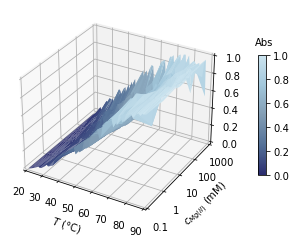

In [14]:
fig = plt.figure()
#ax = fig.gca(projection='3d') # funktioniert nicht mit neuester matplotlib-version
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(data_II['Temperature (C)'], data_II['log_conc'], data_II['norm_Abs'], cmap=my_gradient_blue, linewidth=0.1)
plt.colorbar(surf, shrink=0.55, aspect=15,pad = 0.1, location='right').set_label(label='Abs',size=10, labelpad=-25, y=1.15, rotation=0)
surf.set_clim(vmin=0, vmax=1)
yticks = [-1,0, 1, 2, 3]
ylabel = ['0.1','1', '10', '100', '1000']
ax.set_yticks(yticks, labels = ylabel)
ax.set_ylim([-1,3])
ax.set_xlim([20,90])
ax.set_zlim([0,1])
plt.xlabel('$T$ (°C)')
plt.ylabel('$c_{Mg(II)}$ (mM)')
#plt.savefig(".png", dpi=600, bbox_inches="tight")
plt.show()

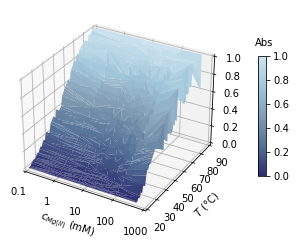

In [15]:
fig = plt.figure()
#ax = fig.gca(projection='3d') # funktioniert nicht mit neuester matplotlib-version
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(data_II['log_conc'], data_II['Temperature (C)'], data_II['norm_Abs'], cmap=my_gradient_blue, linewidth=0.1)
plt.colorbar(surf, shrink=0.55, aspect=15,pad = 0.1, location='right').set_label(label='Abs',size=10, labelpad=-25, y=1.15, rotation=0)
surf.set_clim(vmin=0.0, vmax=1.0)
xticks = [-1, 0, 1, 2, 3]
xlabel = ['0.1', '1', '10', '100', '1000']
ax.set_xticks(xticks, labels = xlabel)
ax.set_xlim([-1,3])
ax.set_ylim([20,90])
ax.set_zlim([0.0,1.0])
plt.ylabel('$T$ (°C)')
plt.xlabel('$c_{Mg(II)}$ (mM)')
plt.show()

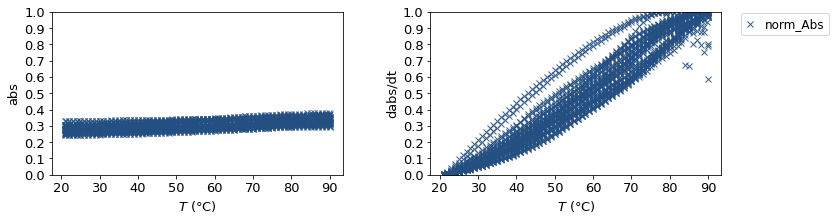

In [16]:
#f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), sharex=False, sharey=False, squeeze=False)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3), sharex=False, sharey=False, squeeze=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
temps = 8
palette = plt.get_cmap('Accent',temps)
# draw plot for the two plots
ax[0,0].scatter(data_II["Temperature (C)"], data_II["Abs"], marker='x', color=rgb_to_hex((36, 79, 130)), linewidth=1, alpha=0.9, label='abs')

ax[0,1].scatter(data_II["Temperature (C)"], data_II["norm_Abs"], marker='x', color=rgb_to_hex((36, 79, 130)), linewidth=1, alpha=0.9, label='norm_Abs')

ax[0,0].set_ylim([0.0,1])
ax[0,1].set_ylim([0.0,1.0])
ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[0,0].locator_params(axis="both", nbins=10)
ax[0,1].locator_params(axis="both", nbins=10)
ax[0,0].set_xlabel('$T$ (°C)', fontsize = 13)
ax[0,1].set_xlabel('$T$ (°C)', fontsize = 13)
ax[0,0].set_ylabel("abs", fontsize = 13)
ax[0,1].set_ylabel("dabs/dt", fontsize = 13)
plt.legend(frameon=True, handlelength=0.75, fontsize='large', loc='upper right', bbox_to_anchor=(1.39, 1.03))
#plt.savefig(".png", dpi=600, bbox_inches="tight")
#plt.savefig(".svg", dpi=600, bbox_inches="tight")
plt.show()